# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### Check R version

In [68]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.1. Install

In [69]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL
# conda install r-corrplot
# conda install r-rcompanion
# conda install r-pcaPP
# conda install r-caret
# conda install r-gmodels
# conda install r-DescTools
# conda install r-epitools
# conda install r-ranger
# conda install r-psych
# conda install r-bestglm

### 0.2. Import

In [70]:
library(corrplot)
library(rcompanion)
library(pcaPP)
library(caret)
library(gmodels)
library(DescTools)
library(ranger)
library(psych)
library(bestglm)

## 1. Import Data

In [71]:
input_data = read.csv("diabetes_full_data.csv")

In [72]:
df = data.frame(input_data)

In [73]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


## 2. Data Preprocessing

### 2.0. Standardize column names

In [74]:
colnames(df)
# Column "X" should be changed to be a more meaningful name.

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [75]:
colnames(df)[1] = "Index"

In [76]:
colnames(df)

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

### 2.1. Mismatched data types

In [77]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [78]:
# All columns have correct data type

### 2.2. Mixed data values

In [79]:
# Example: (female, woman, man, male) => (male, female)

In [80]:
# This dataset contains only number data => No mixed data values

### 2.3. Missing data

#### 2.3.1 Null data

In [81]:
sum(is.na(df))

[1] 0

In [82]:
# This dataset has no missing values

#### 2.3.2 Missing data in specific columns

In [83]:
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [84]:
nrow(subset(df, Age == 14))

[1] 0

In [85]:
# Conclusion: The dataset has no missing data.

In [86]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 3. Exploratory data analysis (EDA)

### 3.0. Detect Numerical, Binary, Ordinal variables

In [65]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_col), length(binary_col), length(ordinal_col)), nrow = 3)
rownames(display_matrix) = c("numerical_col", "binary_col", "ordinal_col")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_col,3
binary_col,14
ordinal_col,4


### 3.1. Response variable analysis

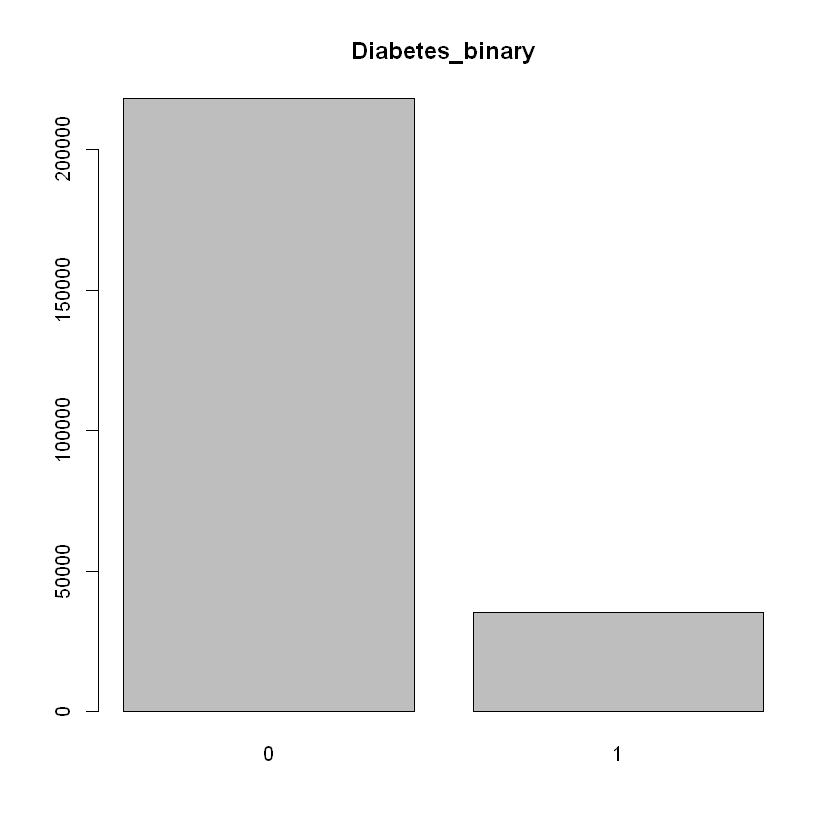

In [88]:
barplot(table(df[,response_col]), main = response_col)

In [89]:
nrow(df[df$Diabetes_binary == 1, ]) / nrow(df)

[1] 0.139333

### 3.2. Numerical variables analysis

In [90]:
# Numerical variables (3): BMI, MentHlth, PhysHlth

In [91]:
describeBy(df[,numerical_cols], df[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 218334 27.81 6.29     27   27.15 4.45  12  98    86 2.33    13.62
MentHlth    2 218334  2.98 7.11      0    0.94 0.00   0  30    30 2.86     7.37
PhysHlth    3 218334  3.64 8.06      0    1.30 0.00   0  30    30 2.50     5.00
           se
BMI      0.01
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars     n  mean    sd median trimmed  mad min max range skew kurtosis
BMI         1 35346 31.94  7.36     31   31.24 5.93  13  98    85 1.53     5.72
MentHlth    2 35346  4.46  8.95      0    2.02 0.00   0  30    30 2.06     2.87
PhysHlth    3 35346  7.95 11.30      1    6.19 1.48   0  30    30 1.15    -0.34
           se
BMI      0.04
MentHlth 0.05
PhysHlth 0.06

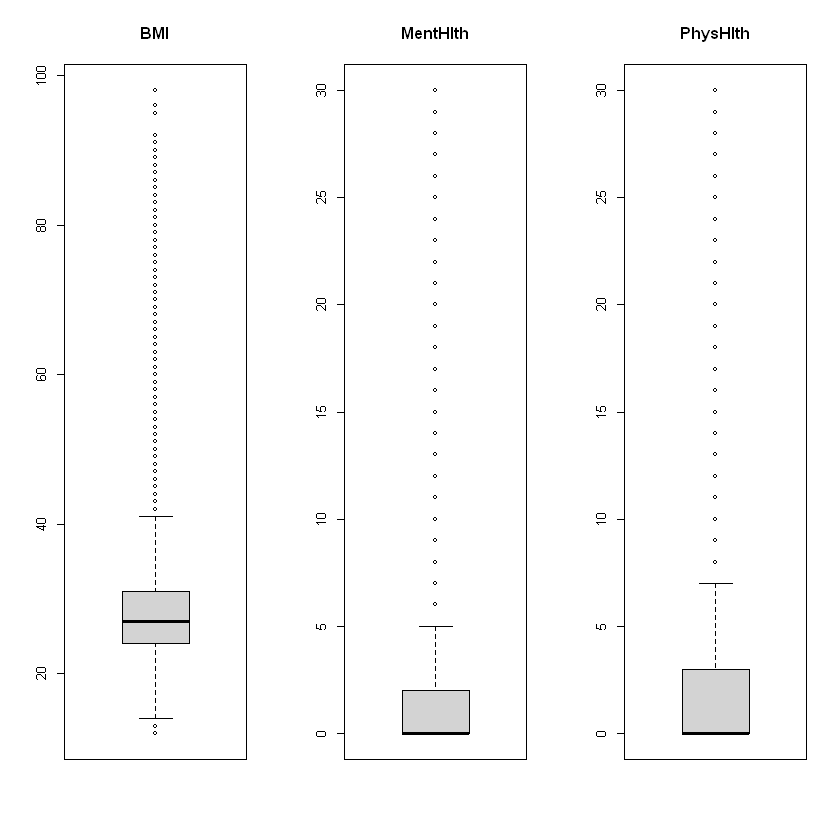

In [92]:
par(mfrow=c(1,3))
boxplot(df$BMI, main="BMI")
boxplot(df$MentHlth, main="MentHlth")
boxplot(df$PhysHlth, main="PhysHlth")

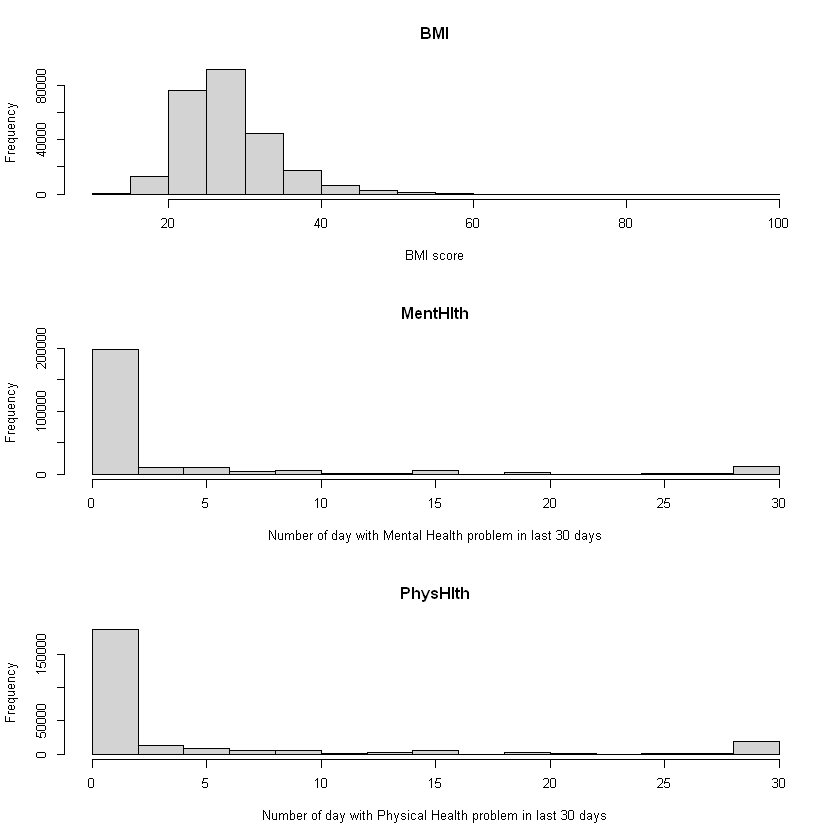

In [93]:
par(mfrow=c(3,1))
hist(df$BMI, main="BMI", xlab="BMI score")
hist(df$MentHlth, main="MentHlth", xlab="Number of day with Mental Health problem in last 30 days")
hist(df$PhysHlth, main="PhysHlth", xlab="Number of day with Physical Health problem in last 30 days")

### 3.3. Categorical variables analysis

In [27]:
# Categorical variables (18): HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,
# AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex, Age, Education, Income.

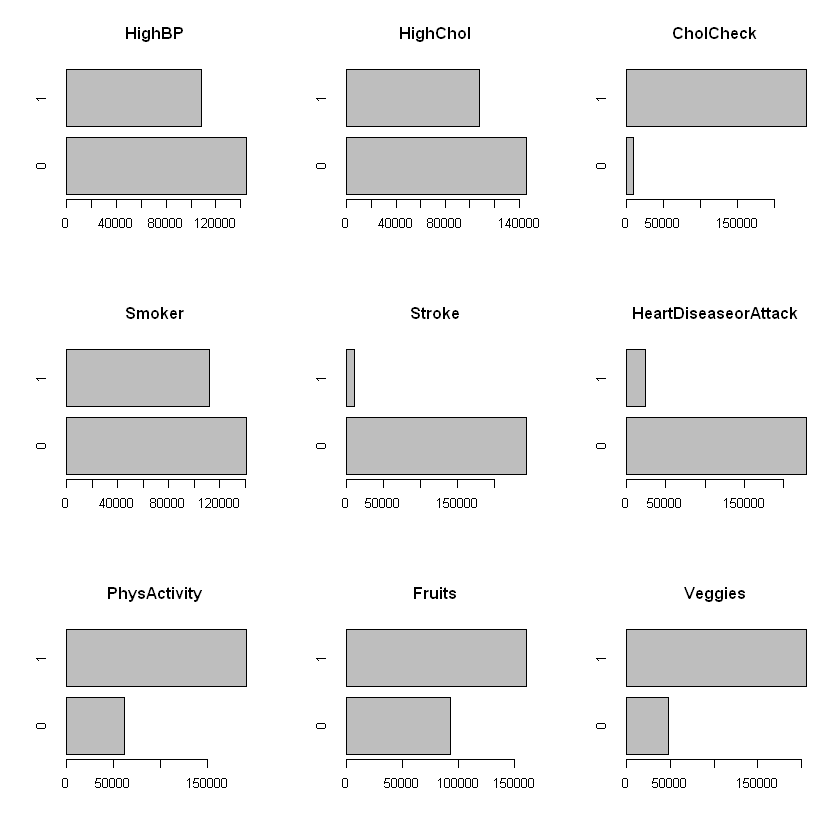

In [94]:
# Plot first 9 categorical variables: 
# HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
par(mfrow=c(3,3))
barplot(table(df$HighBP), horiz=T, main="HighBP")
barplot(table(df$HighChol), horiz=T, main="HighChol")
barplot(table(df$CholCheck), horiz=T, main="CholCheck")
barplot(table(df$Smoker), horiz=T, main="Smoker")
barplot(table(df$Stroke), horiz=T, main="Stroke")
barplot(table(df$HeartDiseaseorAttack), horiz=T, main="HeartDiseaseorAttack")
barplot(table(df$PhysActivity), horiz=T, main="PhysActivity")
barplot(table(df$Fruits), horiz=T, main="Fruits")
barplot(table(df$Veggies), horiz=T, main="Veggies")

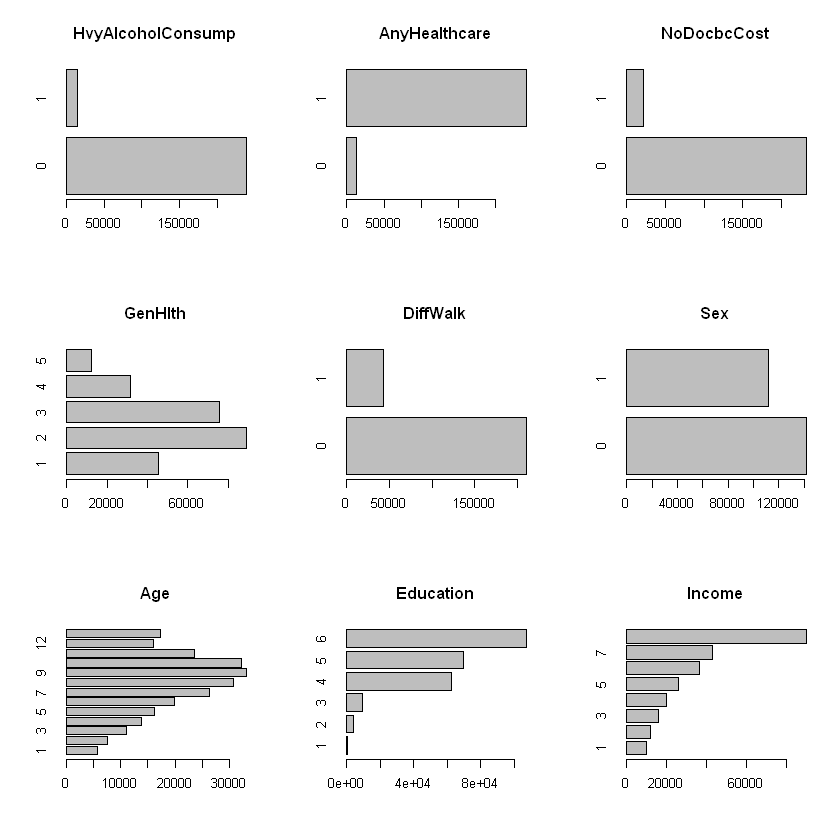

In [95]:
# Plot last 9 categorical variables
# HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, 
# DiffWalk, Sex, Age, Education, Income.
par(mfrow=c(3,3))
barplot(table(df$HvyAlcoholConsump), horiz=T, main="HvyAlcoholConsump")
barplot(table(df$AnyHealthcare), horiz=T, main="AnyHealthcare")
barplot(table(df$NoDocbcCost), horiz=T, main="NoDocbcCost")
barplot(table(df$GenHlth), horiz=T, main="GenHlth")
barplot(table(df$DiffWalk), horiz=T, main="DiffWalk")
barplot(table(df$Sex), horiz=T, main="Sex")
barplot(table(df$Age), horiz=T, main="Age")
barplot(table(df$Education), horiz=T, main="Education")
barplot(table(df$Income), horiz=T, main="Income")

In [96]:
summary_categorical_variables = function(df, explain_col, response_col, is.binary = T, prop.r = T,
                                        prop.c = T, prop.t = T)
{
    contingency_table = table(df[, explain_col], df[, response_col], dnn = c(explain_col, response_col))
    if (is.binary)
    {
        rownames(contingency_table) = c(paste("no", explain_col), explain_col)
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
        print("Odds Ratio")
        print(OddsRatio(contingency_table, conf.level = 0.95))
        print("Relative Risk")
        print(RelRisk(contingency_table, conf.level = 0.95, method = "wald"))
    }
    else
    {
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
    }
}

In [98]:
for (bin_col in binary_cols)
{
    summary_categorical_variables(df, bin_col, response_col)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
      HighBP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
   no HighBP |    136109 |      8742 |    144851 | 
             |     0.940 |     0.060 |     0.571 | 
             |     0.623 |     0.247 |           | 
             |     0.537 |     0.034 |           | 
-------------|-----------|-----------|-----------|
      HighBP |     82225 |     26604 |    108829 | 
             |     0.756 |     0.244 |     0.429 | 
             |     0.377 |     0.753 |           | 
             |     0.324 |     0.105 |           | 
-------------|-----------|-----------|-----------|
Column Total |    218334 |     35346 |    253680 | 
             |     0.861 |     0.139 |           | 
-----------

In [99]:
for (ord_col in ordinal_cols)
{
    summary_categorical_variables(df, ord_col, response_col, is.binary = F)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
     GenHlth |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     44159 |      1140 |     45299 | 
             |     0.975 |     0.025 |     0.179 | 
             |     0.202 |     0.032 |           | 
             |     0.174 |     0.004 |           | 
-------------|-----------|-----------|-----------|
           2 |     82703 |      6381 |     89084 | 
             |     0.928 |     0.072 |     0.351 | 
             |     0.379 |     0.181 |           | 
             |     0.326 |     0.025 |           | 
-------------|-----------|-----------|-----------|
           3 |     62189 |     13457 |     75646 | 
             |     0.822 |     0.178 |     0.298 | 
           

### 3.4. Correlation analysis

In [33]:
# One hot encoder all categorical columns before next step.

In [101]:
get_correlation = function(dataframe, col_1, col_2, numerical_cols, binary_cols, ordinal_cols, response_col)
{
    if (col_1 %in% ordinal_cols || col_2 %in% ordinal_cols)
    {
        return (cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% c(binary_cols, response_col) ||
             col_1 %in% c(binary_cols, response_col) && col_2 %in% numerical_cols)
    {
        return (cor.test(dataframe[,col_1], dataframe[,col_2])$estimate)
    }
    else if (col_1 %in% c(binary_cols, response_col) && col_2 %in% c(binary_cols, response_col))
    {
        return (cramerV(table(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% numerical_cols)
    {
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (0)
    }
}    

In [35]:
# get_correlation(df, "BMI", "PhysHlth", numerical_col, binary_col, ordinal_col)

In [102]:
all_colnames = colnames(df)

In [103]:
all_colnames

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [104]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames), dimnames = list(all_colnames, all_colnames))

In [105]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(df, all_colnames[row_index],
                                                                       all_colnames[col_index], numerical_cols, 
                                                                       binary_cols, ordinal_cols, response_col)
        }
    }    
}

In [106]:
correlation_matrix

,Index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
Index,1,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.00000000,0.01120463,0.000000000,0.000000000,0.0000000,0.000000000,-0.011114543,-0.022069633,-0.02338277,0.00000000
HighBP,0,1,0.2982,0.09851,0.21374812,0.09699000,0.12960000,0.20940000,0.1253000,0.04055000,⋯,0.01736000,0.27684409,0.056455917,0.161211571,0.2236000,0.052210000,0.293883910,-0.132261074,-0.15907727,0.26310000
HighChol,0,0,1.0000,0.08564,0.10672208,0.09130000,0.09262000,0.18080000,0.0780500,0.04086000,⋯,0.01331000,0.19044111,0.062069154,0.121750528,0.1447000,0.031210000,0.227197645,-0.064141477,-0.07805095,0.20030000
CholCheck,0,0,0.0000,1.00000,0.03449509,0.00992900,0.02416000,0.04421000,0.0041900,0.02385000,⋯,0.05826000,0.04230765,-0.008365598,0.031774808,0.0405900,0.022120000,0.079782773,0.003605023,0.01355233,0.06476000
BMI,0,0,0.0000,0.00000,1.00000000,0.01380447,0.02015266,0.05290426,-0.1472936,-0.08751812,⋯,0.05820629,0.20044778,0.085310159,0.121141107,0.1970778,0.042950303,-0.018682591,-0.096272782,-0.06913474,0.21684306
Smoker,0,0,0.0000,0.00000,0.00000000,1.00000000,0.06117000,0.11440000,0.0874000,0.07767000,⋯,0.04895000,0.14513867,0.092196474,0.116459714,0.1225000,0.093660000,0.101764840,-0.161695760,-0.11779172,0.06079000
Stroke,0,0,0.0000,0.00000,0.00000000,0.00000000,1.00000000,0.20300000,0.0691500,0.01339000,⋯,0.03480000,0.14940699,0.070171812,0.148944169,0.1766000,0.002978000,0.110086876,-0.067979132,-0.10985834,0.10580000
HeartDiseaseorAttack,0,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,1.00000000,0.0873000,0.01979000,⋯,0.03100000,0.22111285,0.064621292,0.181697536,0.2127000,0.086100000,0.194173045,-0.089351076,-0.12562478,0.17730000
PhysActivity,0,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,1.0000000,0.14280000,⋯,0.06164000,-0.23388958,-0.125587088,-0.219229522,0.2532000,0.032480000,-0.075105057,0.186553009,0.17937530,0.11810000
Fruits,0,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,1.00000000,⋯,0.04424000,-0.09627343,-0.068217375,-0.044633325,0.0483500,0.091170000,0.057094063,0.107068517,0.06784869,0.04078000


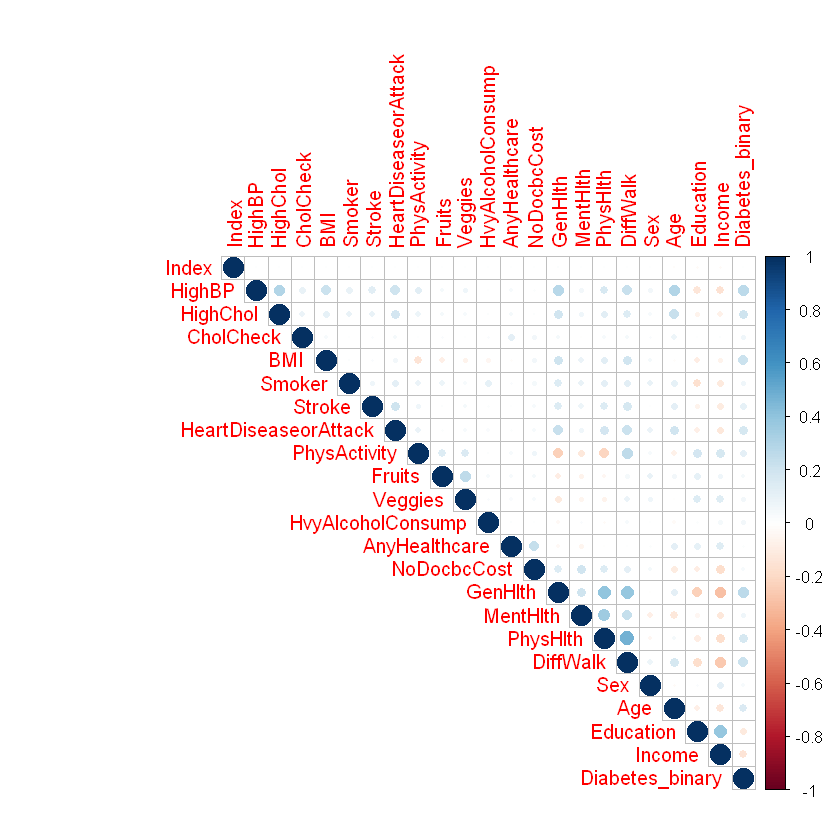

In [107]:
corrplot(correlation_matrix, method="circle", type="upper")

In [42]:
for (i in 1:nrow(correlation_matrix))
{
    print(c(rownames(correlation_matrix)[i], correlation_matrix[i, nrow(correlation_matrix)]))
}

[1] "Index" "0"    
[1] "HighBP" "0.2631"
[1] "HighChol" "0.2003"  
[1] "CholCheck" "0.06476"  
[1] "BMI"               "0.216843060203119"
[1] "Smoker"  "0.06079"
[1] "Stroke" "0.1058"
[1] "HeartDiseaseorAttack" "0.1773"              
[1] "PhysActivity" "0.1181"      
[1] "Fruits"  "0.04078"
[1] "Veggies" "0.05658"
[1] "HvyAlcoholConsump" "0.05706"          
[1] "AnyHealthcare" "0.01626"      
[1] "NoDocbcCost" "0.03143"    
[1] "GenHlth"           "0.262601954027565"
[1] "MentHlth"           "0.0693150826383553"
[1] "PhysHlth"          "0.171336700387252"
[1] "DiffWalk" "0.2183"  
[1] "Sex"     "0.03143"
[1] "Age"               "0.151562571648901"
[1] "Education"         "-0.11182832020598"
[1] "Income"             "-0.144998176285264"
[1] "Diabetes_binary" "1"              


## 4. Model building

### 4.1. Split data

In [43]:
set.seed(123)
index = createDataPartition(df$Diabetes_binary, p = 0.8, list = FALSE)
training_data = df[index, ]
testing_data = df[-index, ]

In [44]:
nrow(training_data)

[1] 202944

In [45]:
nrow(training_data[training_data$Diabetes_binary == 1, ]) / nrow(training_data)

[1] 0.1393439

In [46]:
nrow(testing_data)

[1] 50736

In [47]:
nrow(testing_data[testing_data$Diabetes_binary == 1, ]) / nrow(testing_data)

[1] 0.1392897

### 4.2. Features selection for model building

#### 4.2.1. Univariate linear regression model analysis (OLS)

In [48]:
# Calculate p_value of EACH variable in lm()
# Input: dataframe, response variable name

summary_univariate_lm = function(df, response_variable_name, just_p_value=FALSE) {
	# Get the names of explanatory variables (excluding response variable)
	explanatory_vars <- names(df)[names(df) != response_variable_name]
	
	# Create an empty list to store model objects
	models <- list()
	
	# Loop through each explanatory variable and fit a linear model
	for (var in explanatory_vars) {
	  # Formula for the linear model
	  formula <- formula(paste(response_variable_name, "~", var))
	  
	  # Fit the linear model
	  model <- lm(formula, data = df)
	  
	  # Store the model object in the list
	  models[[var]] <- model
	}
	
	# Access the models and their summaries
	for (var in explanatory_vars) {
	  cat("Variable:", var, "\n")
	  if (just_p_value)
		  print(summary(models[[var]])$coe[2,4])
		else
			print(summary(models[[var]]))
	}
}

In [49]:
summary_univariate_lm(training_data, "Diabetes_binary", TRUE)

Variable: Index 
[1] 0.2053684
Variable: HighBP 
[1] 0
Variable: HighChol 
[1] 0
Variable: CholCheck 
[1] 1.9607e-193
Variable: BMI 
[1] 0
Variable: Smoker 
[1] 4.445516e-163
Variable: Stroke 
[1] 0
Variable: HeartDiseaseorAttack 
[1] 0
Variable: PhysActivity 
[1] 0
Variable: Fruits 
[1] 6.70964e-76
Variable: Veggies 
[1] 1.222665e-133
Variable: HvyAlcoholConsump 
[1] 1.12114e-143
Variable: AnyHealthcare 
[1] 2.036483e-16
Variable: NoDocbcCost 
[1] 1.278701e-45
Variable: GenHlth 
[1] 0
Variable: MentHlth 
[1] 5.004899e-228
Variable: PhysHlth 
[1] 0
Variable: DiffWalk 
[1] 0
Variable: Sex 
[1] 5.337466e-45
Variable: Age 
[1] 0
Variable: Education 
[1] 0
Variable: Income 
[1] 0


In [50]:
# Index variable is order of rows, it must be excluded for training data

#### 4.2.2. Random forest method

In [51]:
rg.df = ranger(Diabetes_binary ~ ., data = training_data[, -1], importance = "impurity", num.trees = 100)
vimp_result = rg.df$variable.importance
sorted_vimp_result = vimp_result[order(vimp_result, decreasing = F)]

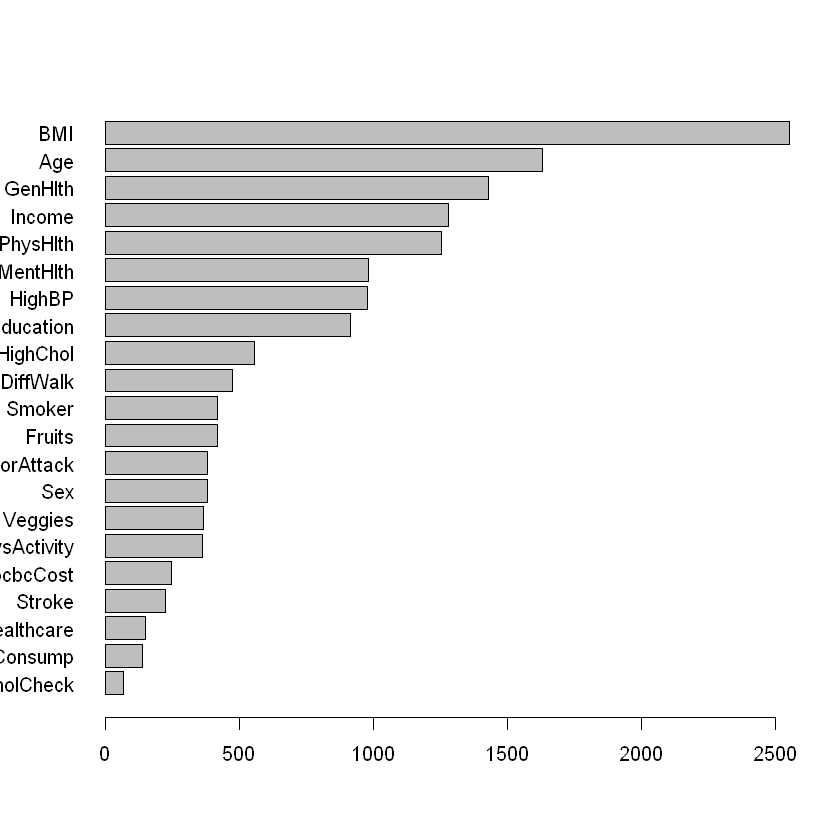

In [52]:
barplot(sorted_vimp_result, horiz = T, las = 1)

In [53]:
sorted_vimp_result = sorted_vimp_result[order(sorted_vimp_result, decreasing = T)]

In [54]:
potential_explain_variable_col = rownames(as.data.frame(sorted_vimp_result))[1:15]

In [55]:
potential_explain_variable_col

[1] "BMI"                  "Age"                  "GenHlth"             
 [4] "Income"               "PhysHlth"             "MentHlth"            
 [7] "HighBP"               "Education"            "HighChol"            
[10] "DiffWalk"             "Smoker"               "Fruits"              
[13] "HeartDiseaseorAttack" "Sex"                  "Veggies"

In [56]:
input_training_data = training_data[,c(potential_explain_variable_col, response_col)]

#### 4.2.3. Factorized data frame

In [316]:
# Extract dataframe with above columns
# Split to training and testing data

In [111]:
# for (bin_col in binary_col)
# {
#     training_data[,ord_col] = factor(training_data[,ord_col])
# }

In [110]:
# for (ord_col in ordinal_col)
# {
#     training_data[,ord_col] = factor(training_data[,ord_col])
# }

In [58]:
str(input_training_data)

'data.frame':	202944 obs. of  16 variables:
 $ BMI                 : int  40 28 27 30 25 30 24 25 34 26 ...
 $ Age                 : int  9 9 11 9 11 9 8 13 10 7 ...
 $ GenHlth             : int  5 5 2 3 3 5 2 3 3 3 ...
 $ Income              : int  3 8 6 7 4 1 3 8 1 7 ...
 $ PhysHlth            : int  15 30 0 14 0 30 0 0 30 15 ...
 $ MentHlth            : int  18 30 0 0 0 30 0 0 0 0 ...
 $ HighBP              : int  1 1 1 1 1 1 0 0 1 0 ...
 $ Education           : int  4 4 3 6 4 5 4 6 5 5 ...
 $ HighChol            : int  1 1 0 0 1 1 0 0 1 0 ...
 $ DiffWalk            : int  1 1 0 0 1 1 0 0 1 0 ...
 $ Smoker              : int  1 0 0 1 1 1 0 1 1 1 ...
 $ Fruits              : int  0 1 1 0 0 1 0 1 1 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 1 0 0 0 0 ...
 $ Sex                 : int  0 0 0 0 0 0 1 1 0 0 ...
 $ Veggies             : int  1 0 1 0 1 1 1 1 1 1 ...
 $ Diabetes_binary     : int  0 0 0 0 0 1 0 1 0 0 ...


#### 4.2.4. AIC and BIC methods

In [ ]:
result_bestglm = bestglm(head(input_training_data, 2000), family = binomial)

Morgan-Tatar search since family is non-gaussian.



In [ ]:
result_bestglm$BestModels

## 5. Reserved

#### 3.2.1. BMI

In [56]:
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

In [57]:
# We see maximum value of BMI is 98 which is abnormal.

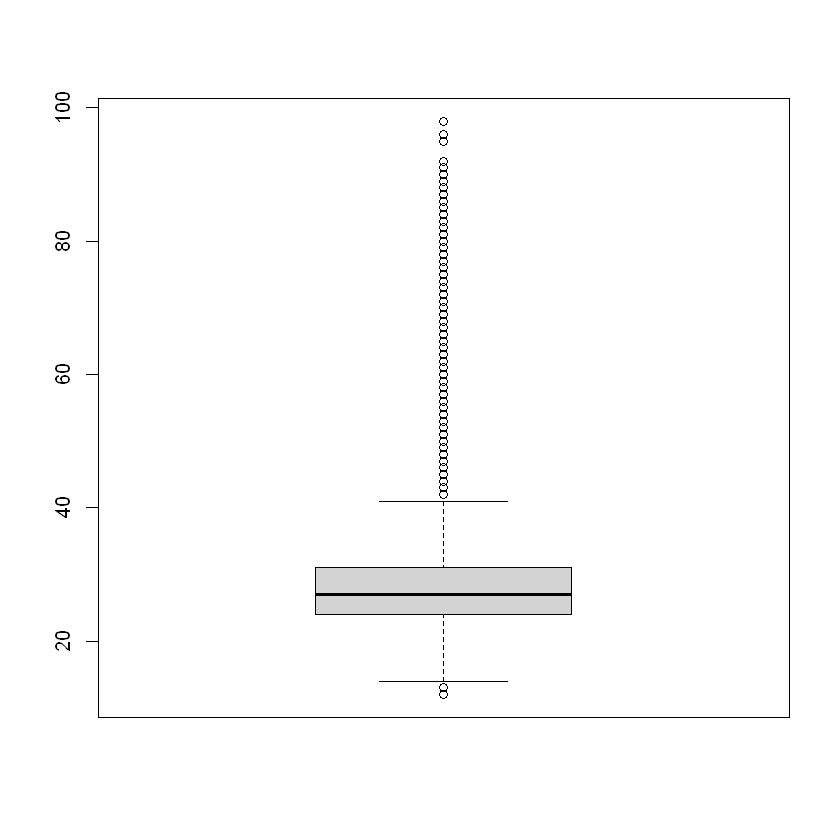

In [58]:
# Boxplot data
boxplot(df$BMI)

In [59]:
# We see that dataset has several outliers in "BMI" column.

In [60]:
BMI_q1 = quantile(df$BMI, 0.25)
BMI_q3 = quantile(df$BMI, 0.75)
BMI_iqr = BMI_q3 - BMI_q1
BMI_lower_bound = BMI_q1 - 1.5 * BMI_iqr
BMI_upper_bound = BMI_q3 + 1.5 * BMI_iqr

In [61]:
BMI_outlier_df = df[df$BMI < BMI_lower_bound | df$BMI > BMI_upper_bound, ]

In [62]:
nrow(BMI_outlier_df) / nrow(df) * 100

[1] 3.881662

In [63]:
# We see that the percentage of outliers is approximately about 4%.
# Extreme values of BMI that higher 40 could affect the model.

# To standardize the BMI index, WHO recommendations is used.
# Reference: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

# |   BMI     | Nutritional Status | Categorical |
# |-----------|--------------------|-------------|
# | < 18.5    | Underweight        |      1      |
# | 18.5–24.9 | Normal weight      |      2      |
# | 25.0–29.9 | Pre-obesity        |      3      |
# | 30.0–34.9 | Obesity class I    |      4      |
# | 35.0–39.9 | Obesity class II   |      5      |
# | > 40      | Obesity class III  |      6      |

new_column = rep(0, nrow(df))
BMI_index = which(colnames(df) == "BMI")
df_std_1 = cbind(df[,1:BMI_index], StdBMI = new_column, df[,(BMI_index + 1):ncol(df)])

In [64]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,0,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1


In [65]:
df_std_1[df_std_1$BMI < 18.5, ]$StdBMI = 1
df_std_1[df_std_1$BMI >= 18.5 & df_std_1$BMI < 25, ]$StdBMI = 2
df_std_1[df_std_1$BMI >= 25 & df_std_1$BMI < 30, ]$StdBMI = 3
df_std_1[df_std_1$BMI >= 30 & df_std_1$BMI < 35, ]$StdBMI = 4
df_std_1[df_std_1$BMI >= 35 & df_std_1$BMI < 40, ]$StdBMI = 5
df_std_1[df_std_1$BMI >= 40, ]$StdBMI = 6

In [66]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,6,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,3,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,3,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,3,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,2,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,3,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,4,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,3,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,4,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1


In [67]:
table(df_std_1$StdBMI)


    1     2     3     4     5     6 
 3127 68953 93749 53451 20663 13737 

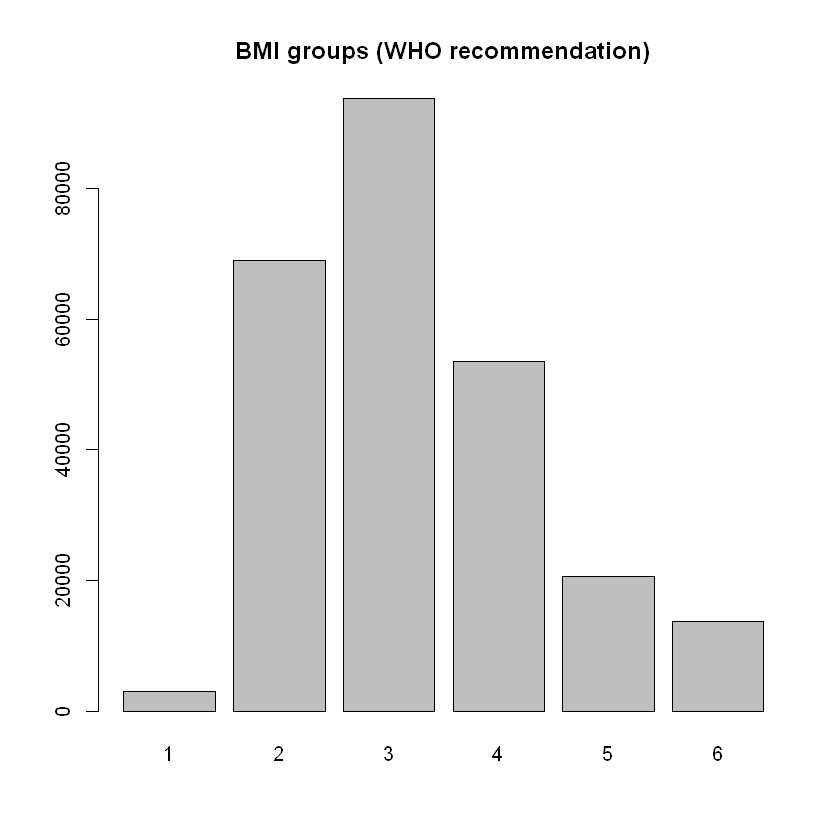

In [68]:
barplot(table(df_std_1$StdBMI), main="BMI groups (WHO recommendation)")

In [69]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : 

In [70]:
# Comment: StdBMI data are categorical.

In [71]:
# We now must validate the meaningful of this standardizatiton with response variable.

In [72]:
table(df_std_1$StdBMI, df_std_1$Diabetes_binary)

   
        0     1
  1  2958   169
  2 65025  3928
  3 83057 10692
  4 43170 10281
  5 14994  5669
  6  9130  4607

In [73]:
chisq.test(table(df_std_1$StdBMI, df_std_1$Diabetes_binary))


	Pearson's Chi-squared test

data:  table(df_std_1$StdBMI, df_std_1$Diabetes_binary)
X-squared = 13387, df = 5, p-value < 2.2e-16


In [74]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BMI groups.

#### BMI output: df_std_1

In [75]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : 

#### 3.2.2. MentHlth

In [76]:
summary(df_std_1$MentHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

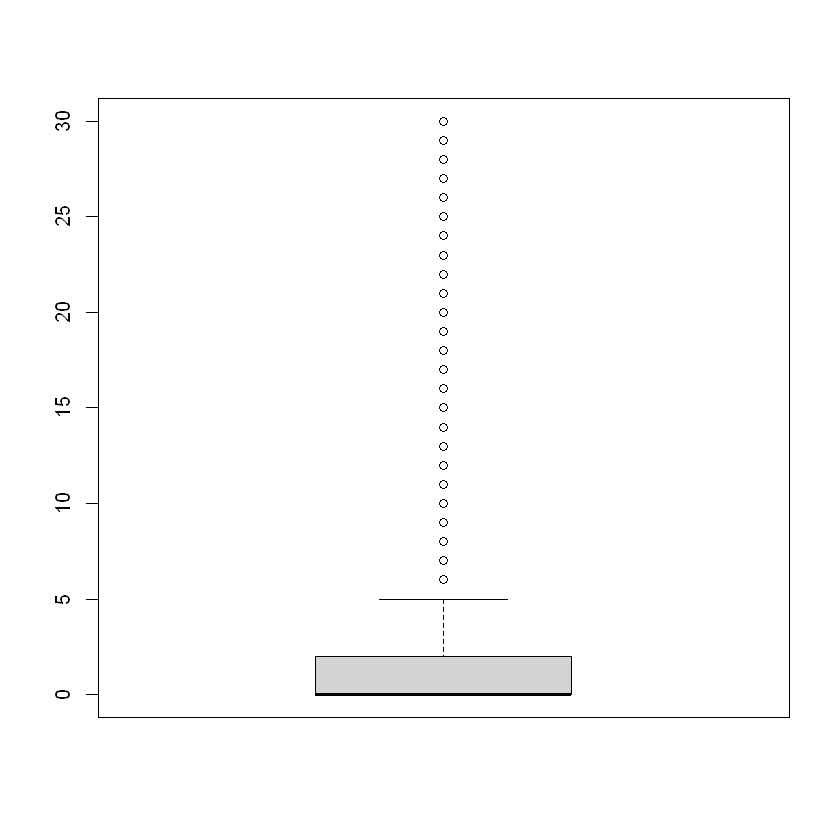

In [77]:
boxplot(df_std_1$MentHlth)

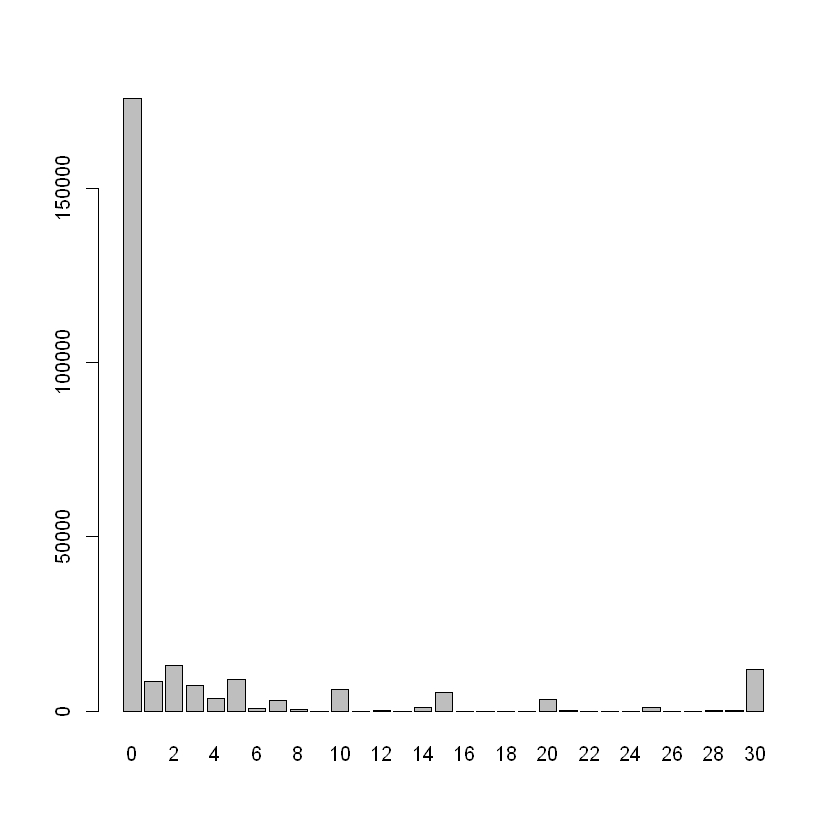

In [78]:
barplot(table(df_std_1$MentHlth))

In [79]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has mental health problem.

In [80]:
new_column = rep(0, nrow(df_std_1))
MentHlth_index = which(colnames(df_std_1) == "MentHlth")
df_std_2 = cbind(df_std_1[,1:MentHlth_index], BoolMentHlth = new_column, df_std_1[,(MentHlth_index+1):ncol(df_std_1)])

In [81]:
df_std_2[df_std_2$MentHlth > 0, ]$BoolMentHlth = 1

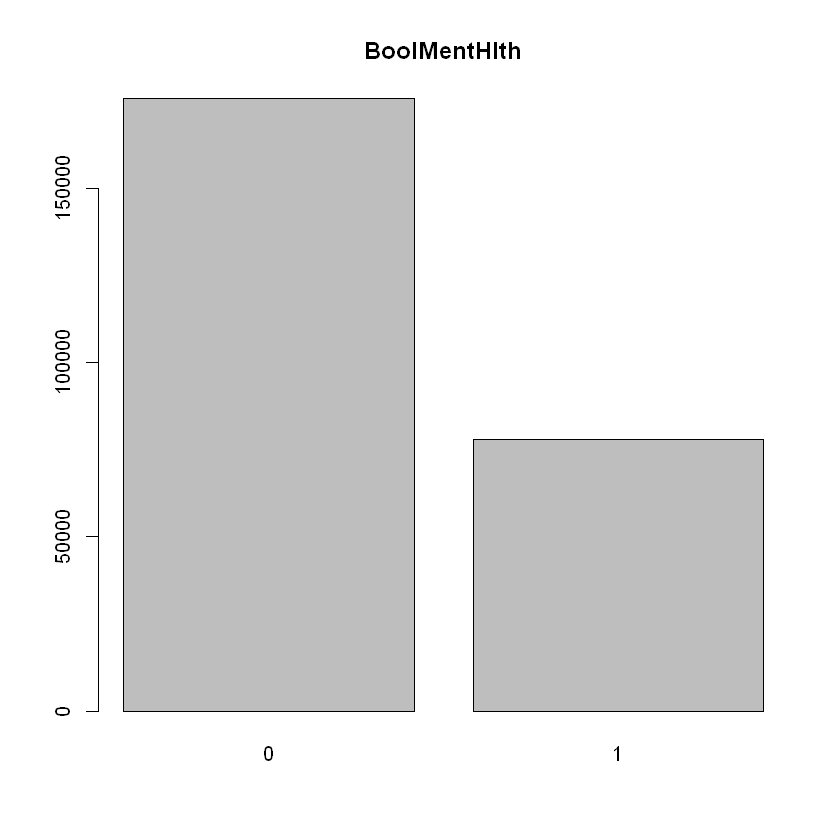

In [82]:
barplot(table(df_std_2$BoolMentHlth), main="BoolMentHlth")

In [83]:
chisq.test(table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary)
X-squared = 178.24, df = 1, p-value < 2.2e-16


In [84]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolMentHlth groups.

#### MentHlth output: df_std_2

In [85]:
str(df_std_2)

'data.frame':	253680 obs. of  25 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ BoolMentHlth        : 

#### 3.2.3. PhysHlth

In [86]:
summary(df_std_2$PhysHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.242   3.000  30.000 

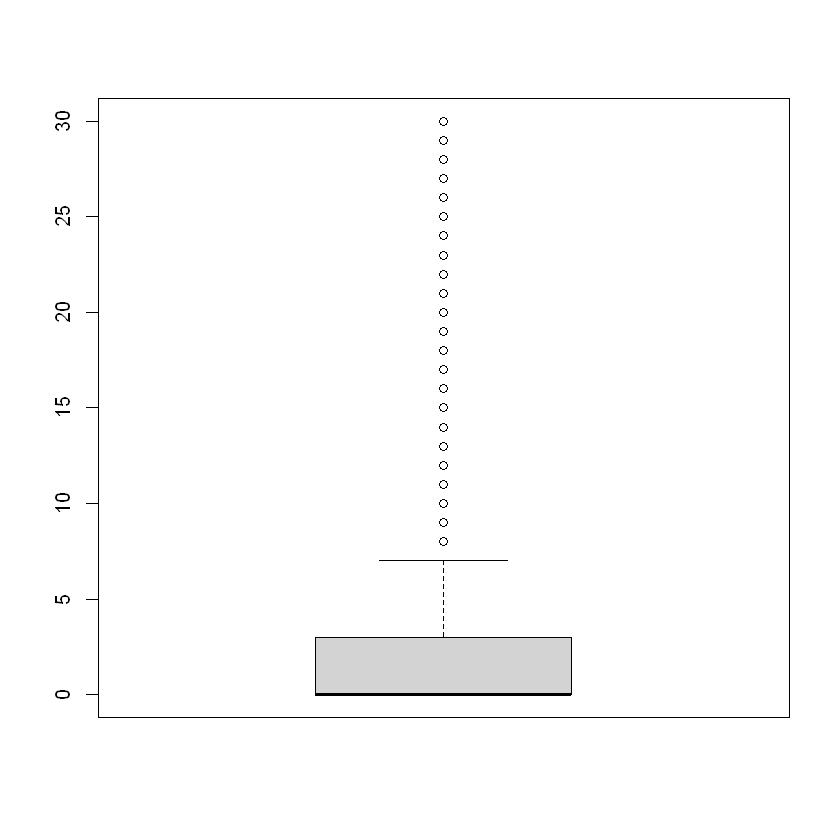

In [87]:
boxplot(df_std_1$PhysHlth)

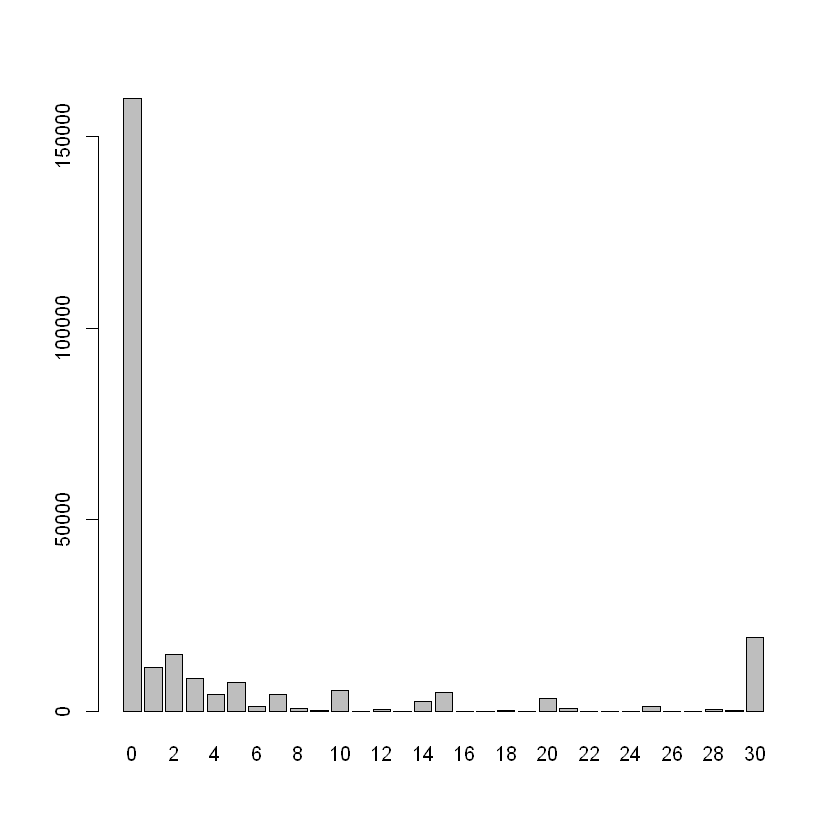

In [88]:
barplot(table(df_std_2$PhysHlth))

In [89]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has physical health problem.

In [90]:
new_column = rep(0, nrow(df_std_2))
PhysHlth_index = which(colnames(df_std_2) == "PhysHlth")
df_std_3 = cbind(df_std_2[,1:PhysHlth_index], BoolPhysHlth = new_column, df_std_2[,(PhysHlth_index+1):ncol(df_std_2)])

In [91]:
df_std_3[df_std_3$PhysHlth > 0, ]$BoolPhysHlth = 1

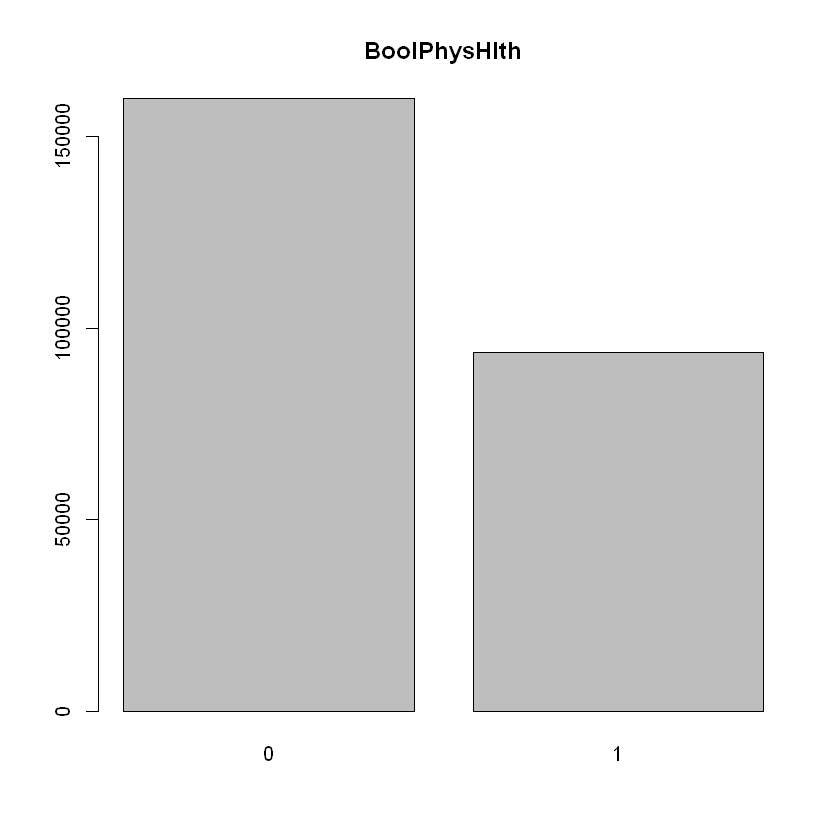

In [92]:
barplot(table(df_std_3$BoolPhysHlth), main="BoolPhysHlth")

In [93]:
chisq.test(table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary)
X-squared = 4364, df = 1, p-value < 2.2e-16


In [94]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolPhysHlth groups.

#### PhysHlth output: df_std_3

In [95]:
str(df_std_3)

'data.frame':	253680 obs. of  26 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : num  6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ BoolMentHlth        : 

## TEST

In [57]:
SAheart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [61]:
str(SAheart)

'data.frame':	462 obs. of  10 variables:
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


In [59]:
bestglm_result = bestglm(SAheart, IC="BIC", family=binomial)

Morgan-Tatar search since family is non-gaussian.



In [60]:
bestglm_result$BestModels

sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,Criterion
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,506.3634
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,509.2566
FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,509.9861
FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,510.5745
FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,510.7933
